Models for COMP562 Final Project

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./data/diabetes_binary_5050.csv")

In [3]:
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [4]:
X_data = df.drop("Diabetes_binary", axis = 1)
Y_data = df["Diabetes_binary"]
label_encoder = LabelEncoder()
Y_data = label_encoder.fit_transform(Y_data)


In [5]:
#80-20 cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)


Logistic Regression Model


In [45]:
lg = LogisticRegression(max_iter = 2000)
lg.fit(X_train, Y_train)
lg_pred = lg.predict(X_test)
lg_pred_prob = lg.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, lg_pred, average = 'weighted')
acc = accuracy_score(Y_test, lg_pred)
prec = precision_score(Y_test, lg_pred, average = 'weighted')
recall = recall_score(Y_test, lg_pred, average = 'weighted')
lg_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(lg_scores[i], 5)))


f1:0.74839
acc:0.7485
prec:0.74901
recall:0.7485


In [46]:
matrix = classification_report(Y_test,lg_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

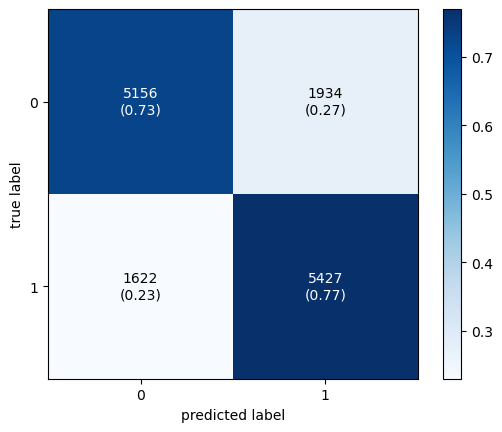

In [47]:
con_mat = confusion_matrix(Y_test,lg_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

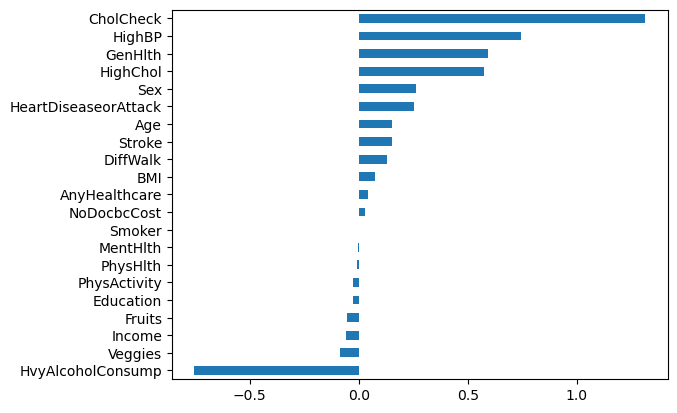

In [48]:
log_imp = pd.Series(lg.coef_[0], index = X_train.columns)
log_imp.sort_values(ascending = True, inplace = True)
log_imp.plot.barh()

Decision tree Classifier Model

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4, 6, 8, 10, 12], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5)  
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [49]:
dt = DecisionTreeClassifier(max_depth= 8, min_samples_leaf = 1, min_samples_split= 10)
dt.fit(X_train , Y_train)
dt_pred=dt.predict(X_test)
dt_pred_prob = dt.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, dt_pred, average = 'weighted')
acc = accuracy_score(Y_test, dt_pred)
prec = precision_score(Y_test, dt_pred, average = 'weighted')
recall = recall_score(Y_test, dt_pred, average = 'weighted')
dt_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(dt_scores[i], 5)))


f1:0.73806
acc:0.73831
prec:0.73936
recall:0.73831


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

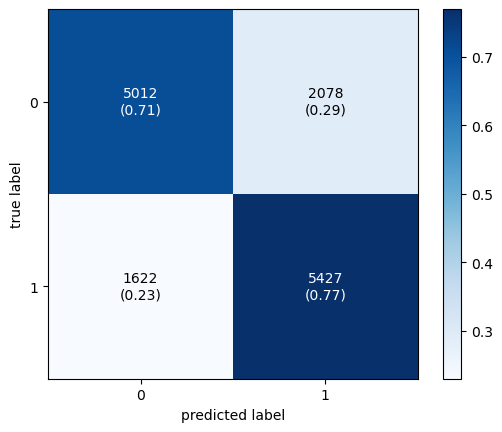

In [50]:
con_mat = confusion_matrix(Y_test,dt_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

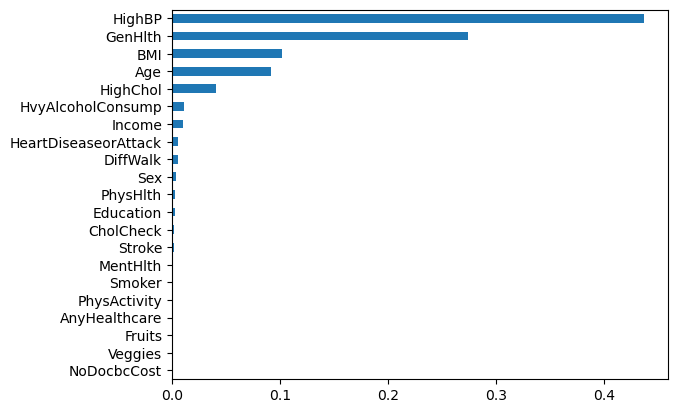

In [51]:
dt_imp = pd.Series(dt.feature_importances_, index = X_train.columns)
dt_imp.sort_values(ascending = True, inplace = True)
dt_imp.plot.barh()

Random Forest Model

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 6, 8, 10, 12, 20]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 12, 'n_estimators': 200}


In [54]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =200, random_state = 42)
rf.fit(X_train , Y_train)
rf_pred=rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, rf_pred, average = 'weighted')
acc = accuracy_score(Y_test, rf_pred)
prec = precision_score(Y_test, rf_pred, average = 'weighted')
recall = recall_score(Y_test, rf_pred, average = 'weighted')
rf_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(rf_scores[i], 5)))

f1:0.75038
acc:0.7509
prec:0.75323
recall:0.7509


In [55]:
matrix = classification_report(Y_test,rf_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      7090
           1       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

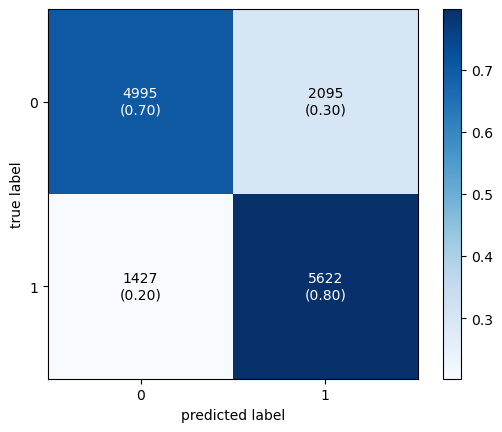

In [58]:
con_mat = confusion_matrix(Y_test,rf_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

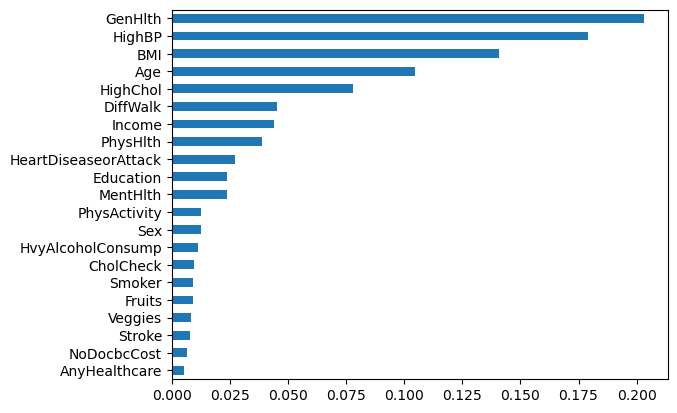

In [57]:
rf_imp = pd.Series(rf.feature_importances_, index = X_train.columns)
rf_imp.sort_values(ascending = True, inplace = True)
rf_imp.plot.barh()

KNN(Use sqrt(Number of samples) for number of neighbors

In [59]:
knn = KNeighborsClassifier(n_neighbors= 265)
knn.fit(X_train , Y_train)
knn_pred=knn.predict(X_test)
knn_pred_prob = knn.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, knn_pred, average = 'weighted')
acc = accuracy_score(Y_test, knn_pred)
prec = precision_score(Y_test, knn_pred, average = 'weighted')
recall = recall_score(Y_test, knn_pred, average = 'weighted')
knn_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(knn_scores[i], 5)))

f1:0.72465
acc:0.72558
prec:0.72894
recall:0.72558


In [60]:
matrix = classification_report(Y_test,knn_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      7090
           1       0.70      0.78      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.72     14139
weighted avg       0.73      0.73      0.72     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

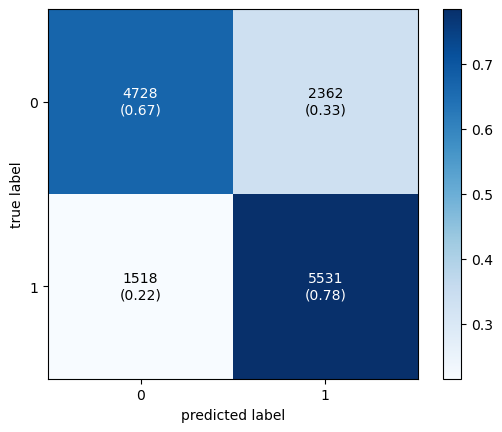

In [61]:
con_mat = confusion_matrix(Y_test,knn_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


SVM

In [66]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train , Y_train)
svm_pred=svm.predict(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, svm_pred, average = 'weighted')
acc = accuracy_score(Y_test, svm_pred)
prec = precision_score(Y_test, svm_pred, average = 'weighted')
recall = recall_score(Y_test, svm_pred, average = 'weighted')
svm_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(svm_scores[i], 5)))

f1:0.74796
acc:0.74843
prec:0.75049
recall:0.74843


In [67]:
matrix = classification_report(Y_test,svm_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      7090
           1       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

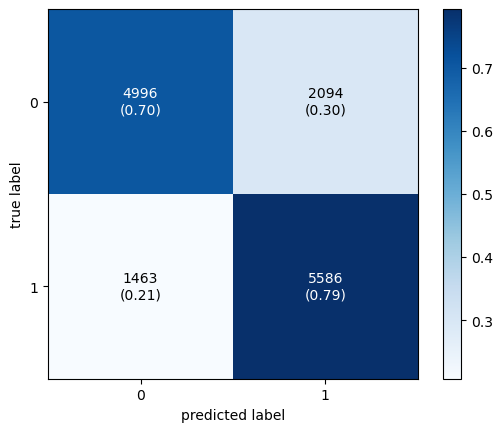

In [68]:
con_mat = confusion_matrix(Y_test,svm_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

<Axes: >

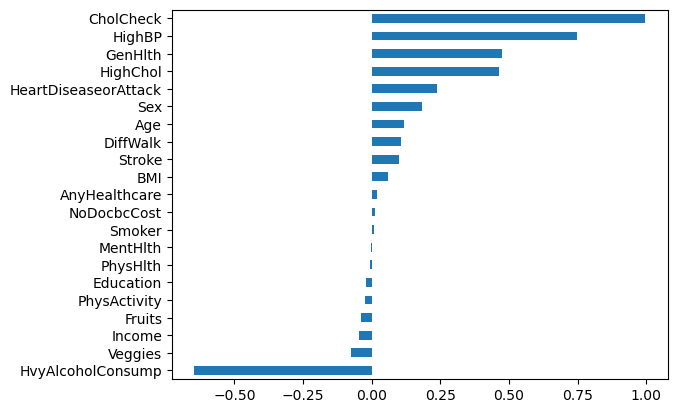

In [69]:
svm_imp = pd.Series(svm.coef_[0],index = X_train.columns)
svm_imp.sort_values(ascending = True, inplace = True)
svm_imp.plot.barh()

XGBoost

In [24]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 6, 9],  
    'n_estimators': [100, 200, 300],  
    'reg_alpha': [0, 0.1, 0.5],  
    'reg_lambda': [0, 1, 5]  
}

xgb = XGBClassifier()

grid_search = GridSearchCV(xgb, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1}


In [62]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, n_estimators = 200, reg_alpha = 0.5, reg_lambda = 1, random_state = 42)
xgb.fit(X_train , Y_train)
xgb_pred=xgb.predict(X_test)
xgb_pred_prob = xgb.predict_proba(X_test)

f1 = f1_score(Y_test, xgb_pred, average = 'weighted')
acc = accuracy_score(Y_test, xgb_pred)
prec = precision_score(Y_test, xgb_pred, average = 'weighted')
recall = recall_score(Y_test, xgb_pred, average = 'weighted')
xgb_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(xgb_scores[i], 5)))

f1:0.75368
acc:0.75416
prec:0.75635
recall:0.75416


In [63]:
matrix = classification_report(Y_test,xgb_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      7090
           1       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

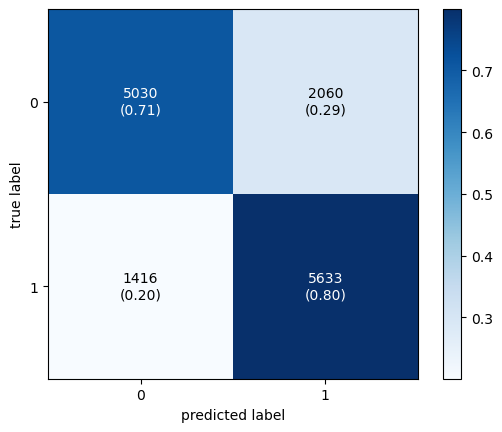

In [64]:
con_mat = confusion_matrix(Y_test,xgb_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

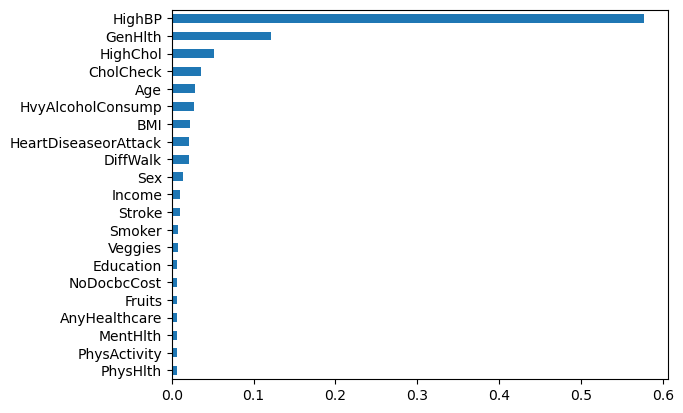

In [65]:
xgb_imp = pd.Series(xgb.feature_importances_, index = X_train.columns)
xgb_imp.sort_values(ascending = True, inplace = True)
xgb_imp.plot.barh()

AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],  # base learner
    'n_estimators': [ 100, 200],  
    'learning_rate': [0.1, 0.5, 1.0]  
}

adaboost = AdaBoostClassifier()


grid_search = GridSearchCV(adaboost, param_grid, cv=5) 
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 200}


In [71]:
abc = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=2),n_estimators=200,learning_rate = 0.1, random_state=42)
abc.fit(X_train , Y_train)
abc_pred=abc.predict(X_test)
metrics = ['f1', 'acc', 'prec', 'recall']
abc_prec = precision_score(Y_test, abc_pred, average = 'weighted')
abc_f1 = f1_score(Y_test, abc_pred, average = 'weighted')
abc_acc = accuracy_score(Y_test, abc_pred)
abc_recall = recall_score(Y_test, abc_pred, average = 'weighted')
abc_scores = [abc_f1, abc_acc, abc_prec, abc_recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(abc_scores[i], 5)))

f1:0.75502
acc:0.75536
prec:0.75694
recall:0.75536


In [42]:
matrix = classification_report(Y_test,abc_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.71      0.75      7090
           1       0.73      0.80      0.77      7049

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

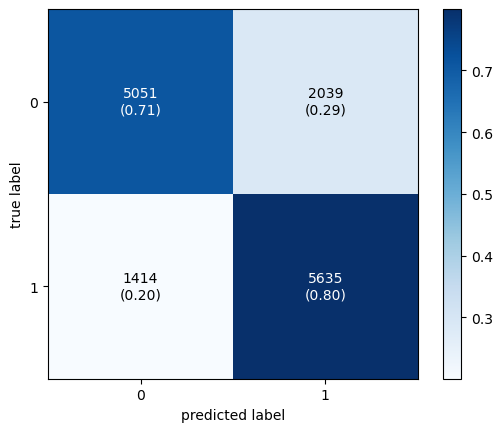

In [43]:
con_mat = confusion_matrix(Y_test,abc_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

<Axes: >

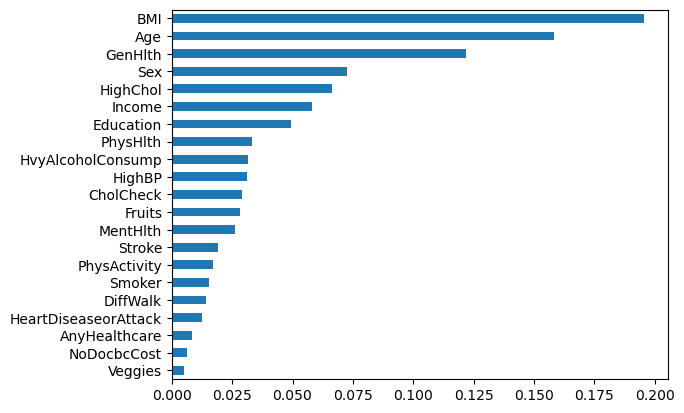

In [44]:
abc_imp = pd.Series(abc.feature_importances_, index=X_data.columns).sort_values(ascending=True)
abc_imp.plot.barh()

MSE Bar Graph

In [73]:
mse_values = {}
lg_mse = mean_squared_error(Y_test, lg_pred)
dt_mse = mean_squared_error(Y_test, dt_pred)
rf_mse = mean_squared_error(Y_test, rf_pred)
knn_mse = mean_squared_error(Y_test, knn_pred)
svm_mse = mean_squared_error(Y_test, svm_pred)
xgb_mse = mean_squared_error(Y_test, xgb_pred)
abc_mse = mean_squared_error(Y_test, abc_pred)

mse_values["Logistic Regression"] = lg_mse
mse_values["Decision Tree"] = dt_mse
mse_values["Random Forest"] = rf_mse
mse_values["KNN"] = knn_mse
mse_values["SVM"] = svm_mse
mse_values["XGBoost"] = xgb_mse
mse_values["AdaBoost"] = abc_mse

In [83]:
mse_values

{'Logistic Regression': 0.25150293514392813,
 'Decision Tree': 0.26168753094278235,
 'Random Forest': 0.2490982389136431,
 'KNN': 0.2744182756913502,
 'SVM': 0.2515736615036424,
 'XGBoost': 0.2458448263667869,
 'AdaBoost': 0.2446424782516444}

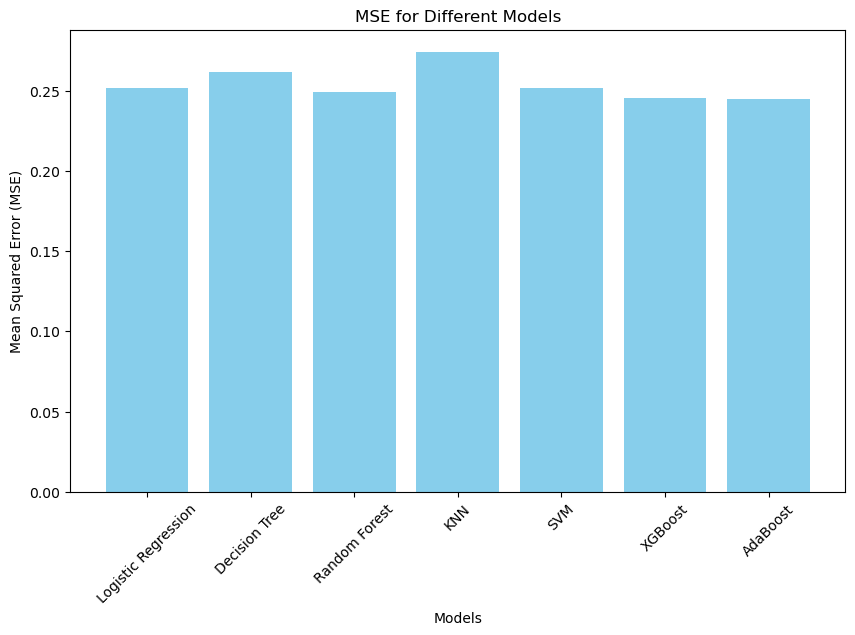

In [86]:
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Models')
plt.xticks(rotation=45)
plt.show()

| Model     | Accuracy | F1 | Precision | Recall |
| ----------- | ----------- | ----------- | ----------- |  ----------- |
| Logistic Regression| 0.7485| 0.74839|0.74901|0.7485|
| Decision Tree  | 0.73831 | 0.73806|0.73936|0.73831|
| Random Forest | 0.7509 | 0.75038| 0.75323| 0.7509|
| KNN  |   0.72558     |0.72465| 0.72894| 0.72558|
| SVM      | 0.74843     | 0.74796 | 0.75049| 0.74843|
| XGBoost   |   0.75416     | 0.75368| 0.75635| 0.75416|
| AdaBoost   |   0.75536    | 0.75502 | 0.75694| 0.75536|